# 15.Regression 회귀 분석

## 설정

### 설정

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [ ]:
!apt-get install -y fonts-nanum
!fc-chache -fv
!rm ~/.cache/matplotlib -rf

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'fc-chache'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기 + 데이터 전처리

In [ ]:
df = pd.read_csv('./data/12_2.NeutralFat.csv', encoding = 'cp949')
df.head()

,col,fat
0,108.4,44.1
1,110.4,40.9
2,127.1,44.3
3,128.2,50.5
4,131.7,77.3


In [ ]:
# 행, 열 개수 세기

df.shape

(60, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col     60 non-null     float64
 1   fat     60 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
col,60.0,169.25,25.91,108.4,149.60,168.7,185.68,229.4
fat,60.0,105.53,50.59,40.9,64.53,98.8,137.85,228.2


## Regression

In [ ]:
column = ['col'] #독립변수

formula = "fat ~ " + "+".join(column)
formula

'fat ~ col'

In [ ]:
from patsy import dmatrices

y, x = dmatrices(formula,
                 data = df,
                 return_type = 'dataframe') # 종속변수 먼저 작성

In [ ]:
model = sm.OLS(y, x) # 회귀 모델 생성

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    fat   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     43.50
Date:                Fri, 09 Jan 2026   Prob (F-statistic):           1.40e-08
Time:                        14:46:52   Log-Likelihood:                -303.27
No. Observations:                  60   AIC:                             610.5
Df Residuals:                      58   BIC:                             614.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.8193     33.178     -3.340      0.0

omnibus, jb는 정규성 검정. 둘 다 0.05 이상으로 귀무가설 채택. 정규성 만족

Cond. No. --> VIF

## 등분산성 검정

In [ ]:
# 잔차의 등분산성 검정 : breush-Pagan

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange Multiplier statistic""01.Python 기초 사용법.ipynb", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange Multiplier statistic01.Python 기초 사용법.ipynb',
  np.float64(3.051708475917816)),
 ('p-value', np.float64(0.0806522593331768)),
 ('f-value', np.float64(3.1080667543535414)),
 ('f p-value', np.float64(0.08317323757773469))]

In [ ]:
# 잔차 플롯

# 표준화 잔차 생성

influence = result.get_influence()
res_standard = influence.resid_studentized_internal

# 예측값 생성
pred = result.predict()

# 데이터 프레임 생성
regplot_df = pd.DataFrame({'pred': pred, 'res_standard': res_standard})
regplot_df.head()

,pred,res_standard
0,27.747121,0.449443
1,30.303697,0.290245
2,51.651101,-0.196734
3,53.057218,-0.068353
4,57.531225,0.526471


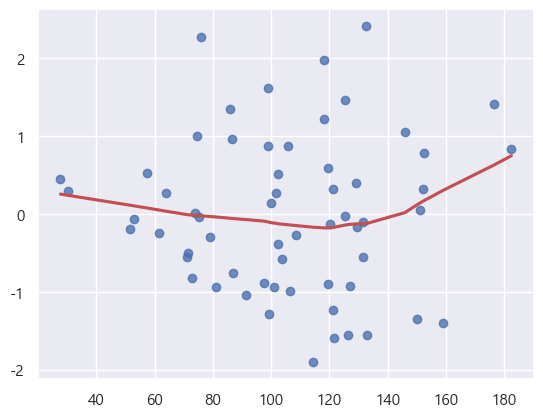

In [ ]:
sns.regplot(x = pred,
            y = res_standard,
            lowess = True,
            line_kws=dict(color = 'r'),
            data = regplot_df)

plt.show()

## 정규성 검정

In [ ]:
# shapiro test

pg.normality(result.resid)

,W,pval,normal
0,0.9828,0.557663,True


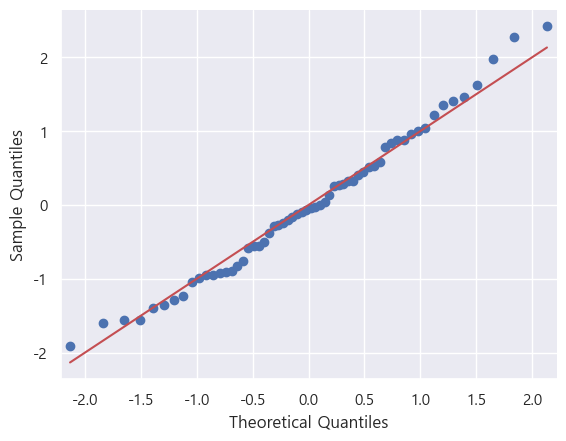

In [ ]:
# QQ plot

sm.qqplot(res_standard, line = 's')
sns.despine()

In [ ]:
# 표준화 잔차를 이용한 이상치 확인

stud_res = result.outlier_test()

stud_res.sort_values(by = 'student_resid', ascending = False).head()

,student_resid,unadj_p,bonf(p)
50,2.526612,0.014318,0.859059
13,2.365622,0.021424,1.000000
35,2.031057,0.046922,1.000000
21,1.649461,0.104554,1.000000
43,1.475345,0.145623,1.000000


In [ ]:
# 회귀 차트



In [ ]:
## 다중 공선성

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i ) for i in range(x.values.shape[1])]
vif['features'] = x.columns

print(vif.round(1))

# 댜중 회귀



## 다중회귀



In [ ]:
# 데이터

df = pd.read_csv('./data/12_1.MR(pred).csv', encoding = 'cp949')
df.head()